In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import json


# Alzheimer

,valid/mcc,test/mcc,valid/acc,test/acc,model
raw,"[0.1950776683169715, -0.05050762722761054, 0.1...","[-0.016878989451394443, 0.09869275424396534, 0...","[0.5909090909090909, 0.43478260869565216, 0.54...","[0.5, 0.56, 0.6071428571428571, 0.431818181818...",raw
robust,"[0.029027606770736975, -0.11213565339313257, 0...","[0.06900655593423542, -0.0657951694959769, 0.1...","[0.5, 0.391304347826087, 0.5151515151515151, 0...","[0.5454545454545454, 0.48, 0.5714285714285714,...",robust
robust_per_batch,"[-0.13226256554061788, -0.2834733547569204, 0....","[0.3563483225498992, 0.08058229640253803, -0.0...","[0.42424242424242425, 0.3695652173913043, 0.56...","[0.6818181818181818, 0.54, 0.5, 0.613636363636...",robust_per_batch
combat,"[0.0, 0.0, 0.22050243429361902, 0.0, 0.0180775...","[0.0, 0.0, 0.16666666666666666, 0.0, -0.018077...","[0.45454545454545453, 0.6956521739130435, 0.57...","[0.5454545454545454, 0.56, 0.6071428571428571,...",combat
harmony,"[0.08084947447499988, -0.002925879814504783, -...","[-0.006995221841570274, 0.006202638032949281, ...","[0.25757575757575757, 0.1813186813186813, 0.18...","[0.17293233082706766, 0.1893939393939394, 0.17...",harmony
waveica,"[0.0, 0.05315584630865053, 0.02275602324190149...","[0.0, 0.023415027021256234, 0.0311178672982481...","[0.16666666666666666, 0.24175824175824176, 0.1...","[0.21052631578947367, 0.24242424242424243, 0.2...",waveica
normae,"[0.42276002160669474, 0.519766161600674, 0.299...","[0.3158629643839434, 0.11775013847245042, 0.02...","[0.71875, 0.7567567567567568, 0.63265306122448...","[0.6274509803921569, 0.5238095238095238, 0.562...",normae
AE-DANN,"[0.3234770633596198, 0.5647058823529412, 0.287...","[0.10185185185185185, 0.07528641589197146, 0.3...","[0.65625, 0.7837837837837838, 0.65306122448979...","[0.5490196078431373, 0.5238095238095238, 0.666...",AE-DANN
AE-invTriplet,"[0.44761904761904764, 0.519766161600674, 0.435...","[0.16666666666666666, 0.2052789530575376, 0.24...","[0.71875, 0.7567567567567568, 0.69387755102040...","[0.5686274509803921, 0.6349206349206349, 0.583...",AE-invTriplet
VAE-DANN,"[0.42276002160669474, 0.519766161600674, 0.471...","[0.42458515414152287, 0.22253695894793382, 0.1...","[0.71875, 0.7567567567567568, 0.73469387755102...","[0.7058823529411765, 0.6349206349206349, 0.520...",VAE-DANN


In [11]:
best_classif = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat', 'harmony', 'waveica']}
# best_models = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
for k in list(best_classif.keys()):
    with open(f"../results/alzheimer/{k}/linsvc/2/saved_models/best_params_inputs_RF_values.json") as f:
        mice_ml_classif_linsvc = json.load(f)
    best_classif[k] = mice_ml_classif_linsvc
best_classif_df = pd.DataFrame(best_classif).T
best_classif_df = best_classif_df.loc[:, ['valid_mcc', 'test_mcc', 'valid_acc', 'test_acc']]
best_classif_df.columns = ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']

ae_classif = pd.read_csv('best_metrics_mlflow_alzheimer_ae_then_classifier_20_518544190099611502_values.csv')
for name in ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']:
    tmp = [ae_classif[name][m].split('[')[1:][0].split(']')[0].split(',') for m in range(len(ae_classif[name]))]
    tmp = [[float(xx) for xx in x] for x in tmp]
    ae_classif[name] = tmp

ae_classif.index = ["AE-DANN", 'VAE-DANN', 'AE-invTriplet', 'VAE-invTriplet', 'AE', 'VAE', 'normae', 'normvae', 'AE-revTriplet', 'VAE-revTriplet']
ae_classif = ae_classif.loc[:, ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']]

ae_classif = pd.concat((best_classif_df, ae_classif), 0)
ae_classif['model'] = ae_classif.index
ae_classif.to_csv('../logs/alz_classif_summary.csv')

ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]


/tmp/ipykernel_3658053/4032678333.py:20: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ae_classif = pd.concat((best_classif_df, ae_classif), 0)
/tmp/ipykernel_3658053/4032678333.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ae_classif.drop([1, 2, 3, 4, 8, 11, 15, 16, 17, 20], 0)


KeyError: '[1, 2, 3, 4, 8, 11, 15, 16, 17, 20] not found in axis'

In [5]:
N = len(ae_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="mcc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['mcc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

NameError: name 'df' is not defined

In [25]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((alz_classif['valid/acc'], alz_classif['test/acc'])),
    # "sd" : pd.concat((alz_classif['valid/mcc_std'], alz_classif['test/mcc_std'])),
    "models": pd.concat((alz_classif['model'], alz_classif['model'])),
    "group": ['valid' for _ in range(len(alz_classif['model']))] + ['test' for _ in range(len(alz_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['valid/acc'],
    "models": alz_classif['model'],
    "group": ['valid' for _ in range(len(alz_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['test/acc'],
    "models": alz_classif['model'],
    "group": ['test' for _ in range(len(alz_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_34371/3334156534.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_34371/3334156534.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_34371/3334156534.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


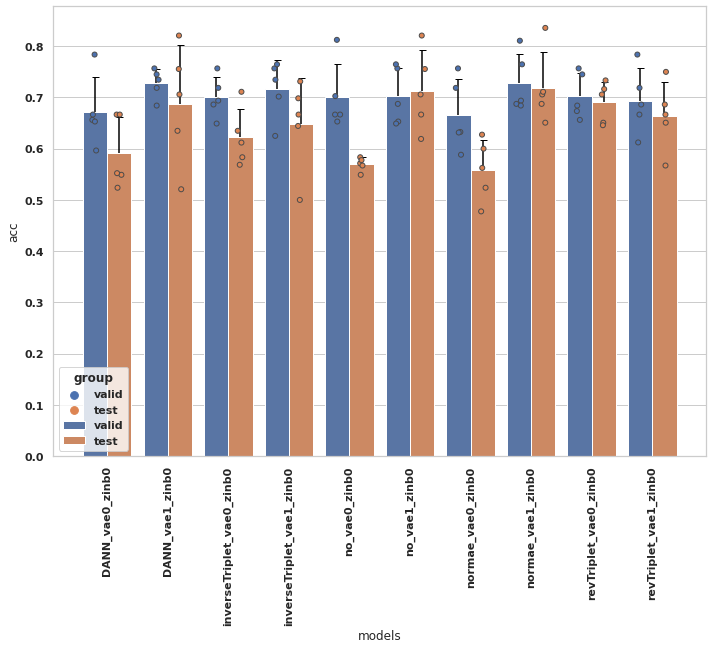

In [26]:
N = len(alz_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="acc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=np.unique(df_valid['models']))

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'])['acc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'])['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

# Adenocarcinoma

In [14]:
best_classif = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat', 'harmony', 'waveica']}
# best_models = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
for k in list(best_classif.keys()):
    with open(f"../results/amide/{k}/linsvc/0/saved_models/best_params_inputs_RF_values.json") as f:
        amide_ml_classif_linsvc = json.load(f)
    best_classif[k] = amide_ml_classif_linsvc
best_classif_df = pd.DataFrame(best_classif).T
best_classif_df = best_classif_df.loc[:, ['valid_mcc', 'test_mcc', 'valid_acc', 'test_acc']]
best_classif_df.columns = ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']

ae_classif = pd.read_csv('best_metrics_mlflow_amide_ae_classifier_20_223790360739349830_values.csv')
for name in ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']:
    tmp = [ae_classif[name][m].split('[')[1:][0].split(']')[0].split(',') for m in range(len(ae_classif[name]))]
    tmp = [[float(xx) for xx in x] for x in tmp]
    ae_classif[name] = tmp

ae_classif.index = ["AE-DANN", 'VAE-DANN', 'AE-invTriplet', 'VAE-invTriplet', 'AE', 'VAE', 'normae', 'normvae', 'AE-revTriplet', 'VAE-revTriplet']
ae_classif = ae_classif.loc[:, ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']]

ae_classif = pd.concat((best_classif_df, ae_classif), 0)
ae_classif['model'] = ae_classif.index
ae_classif.to_csv('../logs/adenocarcinoma_classif_summary.csv')

ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]


/tmp/ipykernel_3658053/2724766518.py:20: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ae_classif = pd.concat((best_classif_df, ae_classif), 0)


,valid/mcc,test/mcc,valid/acc,test/acc,model
raw,"[0.23809523809523808, -0.038778336716474064, 0...","[0.17691188797800642, 0.0, 0.0]","[0.8333333333333334, 0.8645833333333334, 0.880...","[0.8097826086956522, 0.875, 0.875]",raw
robust,"[0.01416592286593837, 0.15511334686589626, 0.0...","[0.01741568361535407, -0.02549395036600892, 0....","[0.296875, 0.3229166666666667, 0.296875]","[0.2391304347826087, 0.2552083333333333, 0.239...",robust
robust_per_batch,"[0.12001161605317065, 0.21862199778627, 0.1200...","[0.03984095364447979, 0.13375105112020325, 0.0...","[0.7760416666666666, 0.8229166666666666, 0.776...","[0.7228260869565217, 0.7864583333333334, 0.739...",robust_per_batch
combat,"[0.11633501014942219, 0.008756782291545563, 0....","[0.19557956467948942, 0.18156825980064073, 0.1...","[0.875, 0.6666666666666666, 0.875]","[0.8804347826086957, 0.78125, 0.8804347826086957]",combat
harmony,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.875, 0.875, 0.875]","[0.875, 0.875, 0.875]",harmony
waveica,"[0.11633501014942219, 0.1619047619047619, 0.19...","[0.0, 0.08451542547285165, 0.0]","[0.875, 0.3333333333333333, 0.8802083333333334]","[0.875, 0.2708333333333333, 0.875]",waveica
normae,"[0.2712648948996098, 0.1489128830115629, 0.329...","[0.12001161605317065, 0.18389242812245682, 0.2...","[0.8315217391304348, 0.7552083333333334, 0.858...","[0.7760416666666666, 0.71875, 0.7864583333333334]",normae
AE-DANN,"[0.3349089004084059, 0.3635920202257515, 0.269...","[0.25482359571881275, 0.3184950571658867, 0.25...","[0.8097826086956522, 0.8072916666666666, 0.798...","[0.828125, 0.7916666666666666, 0.78125]",AE-DANN
AE-invTriplet,"[0.40711742805652384, 0.31804334883755553, 0.2...","[0.11155268706329005, 0.08774330708611852, 0.0...","[0.8260869565217391, 0.8072916666666666, 0.760...","[0.7916666666666666, 0.796875, 0.7708333333333...",AE-invTriplet
VAE-DANN,"[0.14076840629064688, 0.18074621478713568, 0.4...","[0.0, 0.0, 0.055131784641997125]","[0.7391304347826086, 0.484375, 0.907608695652174]","[0.875, 0.125, 0.14583333333333334]",VAE-DANN


In [7]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    # "sd" : ae_classif['valid/mcc_std'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    # "sd" : ae_classif['test/mcc_std'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_983544/89963302.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_983544/89963302.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_983544/89963302.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


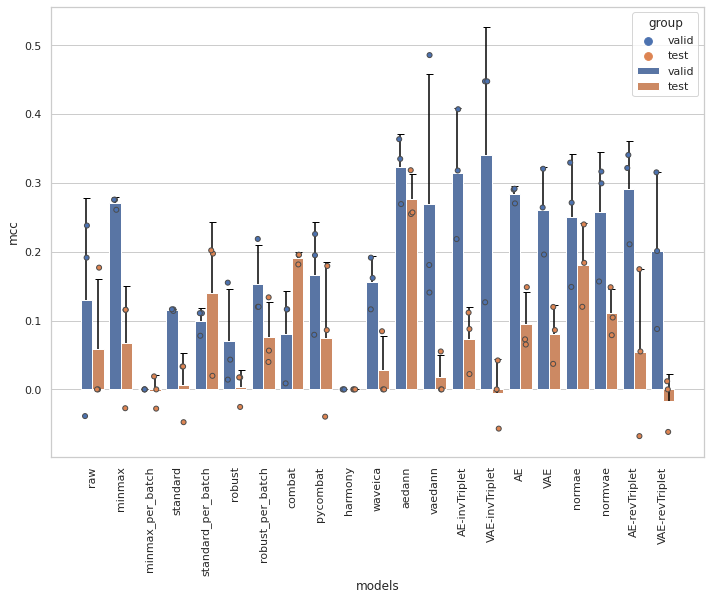

In [8]:
N = len(ae_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="mcc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=ae_classif['model'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

In [92]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_563055/3585783230.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_563055/3585783230.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_563055/3585783230.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


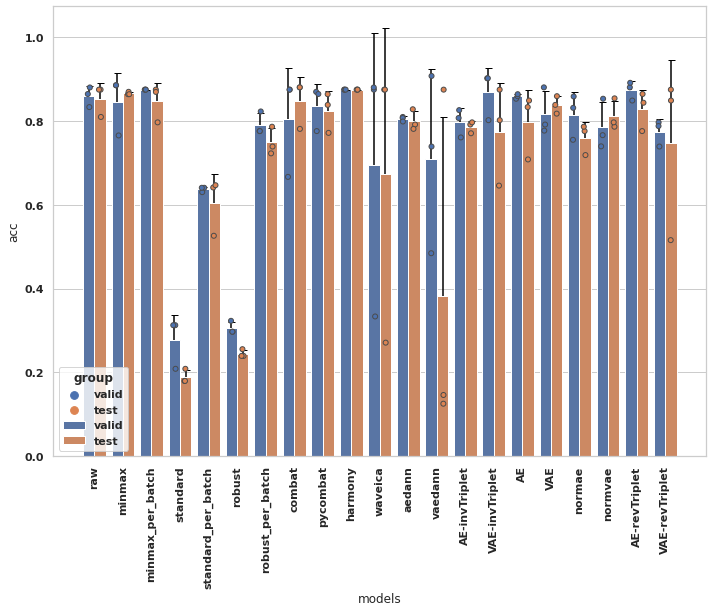

In [94]:
N = len(ae_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="acc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=ae_classif['model'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

# Mice

In [4]:
ae_classif = pd.read_excel('summary_results.xlsx', sheet_name='mice classif')

In [16]:
best_classif = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat', 'harmony', 'waveica']}
# best_models = {x: None for x in ['raw', 'minmax', 'minmax_per_batch', 'standard', 'standard_per_batch', 'robust', 'robust_per_batch', 'combat', 'pycombat']}
for k in list(best_classif.keys()):
    with open(f"../results/mice/{k}/linsvc/0/saved_models/best_params_inputs_RF_values.json") as f:
        mice_ml_classif_linsvc = json.load(f)
    best_classif[k] = mice_ml_classif_linsvc
best_classif_df = pd.DataFrame(best_classif).T
best_classif_df = best_classif_df.loc[:, ['valid_mcc', 'test_mcc', 'valid_acc', 'test_acc']]
best_classif_df.columns = ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']

ae_classif = pd.read_csv('best_metrics_mlflow_mice_ae_classifier_20_802018501396427757_values.csv')
for name in ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']:
    tmp = [ae_classif[name][m].split('[')[1:][0].split(']')[0].split(',') for m in range(len(ae_classif[name]))]
    tmp = [[float(xx) for xx in x] for x in tmp]
    ae_classif[name] = tmp

ae_classif.index = ["AE-DANN", 'VAE-DANN', 'AE-invTriplet', 'VAE-invTriplet', 'AE', 'VAE', 'normae', 'normvae', 'AE-revTriplet', 'VAE-revTriplet']
ae_classif = ae_classif.loc[:, ['valid/mcc', 'test/mcc', 'valid/acc', 'test/acc']]

ae_classif = pd.concat((best_classif_df, ae_classif), 0)
ae_classif['model'] = ae_classif.index
ae_classif.to_csv('../logs/mice_classif_summary.csv')
ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]


/tmp/ipykernel_3658053/3835576184.py:20: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ae_classif = pd.concat((best_classif_df, ae_classif), 0)


,valid/mcc,test/mcc,valid/acc,test/acc,model
raw,"[1.0, 1.0, 0.8807974771786053, 0.8564102564102...","[0.9082951062292475, 0.936491935483871, 0.8660...","[1.0, 1.0, 0.9404761904761905, 0.9285714285714...","[0.9523809523809523, 0.9682539682539683, 0.95,...",raw
robust,"[1.0, 0.8096061912275311, 0.8807974771786053, ...","[0.8055555555555556, 0.9051467776828023, 1.0, ...","[1.0, 0.9024390243902439, 0.9404761904761905, ...","[0.9047619047619048, 0.9523809523809523, 1.0, ...",robust
robust_per_batch,"[0.8777376459253289, 0.8873626373626373, 0.808...","[0.6123724356957946, 0.9090031708997952, 0.681...","[0.935064935064935, 0.9512195121951219, 0.9047...","[0.7619047619047619, 0.9523809523809523, 0.85,...",robust_per_batch
combat,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.44155844155844154, 0.6829268292682927, 0.53...","[0.42857142857142855, 0.49206349206349204, 0.8...",combat
harmony,"[-0.046176378614357194, 0.211088871482546, 0.0...","[-0.31137618438976383, -0.07809475220897141, 0...","[0.4675324675324675, 0.7073170731707317, 0.5, ...","[0.3333333333333333, 0.47619047619047616, 0.45...",harmony
waveica,"[0.8485250152946872, 1.0, 0.9285926891185297, ...","[0.9082951062292475, 0.852386356061616, 0.5527...","[0.922077922077922, 1.0, 0.9642857142857143, 0...","[0.9523809523809523, 0.9206349206349206, 0.75,...",waveica
normae,"[1.0, 1.0, 0.9521367521367521, 0.9521367521367...","[0.9058216273156766, 0.7983329670731314, 0.763...","[1.0, 1.0, 0.9761904761904762, 0.9761904761904...","[0.9523809523809523, 0.8888888888888888, 0.9, ...",normae
AE-DANN,"[1.0, 1.0, 0.9285926891185297, 0.9285926891185...","[0.9082951062292475, 0.96875, 0.68138514386924...","[1.0, 1.0, 0.9642857142857143, 0.9642857142857...","[0.9523809523809523, 0.9841269841269841, 0.85,...",AE-DANN
AE-invTriplet,"[1.0, 1.0, 0.9285926891185297, 0.9521367521367...","[0.9082951062292475, 0.96875, 0.86602540378443...","[1.0, 1.0, 0.9642857142857143, 0.9761904761904...","[0.9523809523809523, 0.9841269841269841, 0.95,...",AE-invTriplet
VAE-DANN,"[1.0, 1.0, 0.9521367521367521, 0.9521367521367...","[0.7302967433402214, 0.96875, 1.0, 1.0, 0.9740...","[1.0, 1.0, 0.9761904761904762, 0.9761904761904...","[0.8571428571428571, 0.9841269841269841, 1.0, ...",VAE-DANN


In [10]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    # "sd" : ae_classif['valid/mcc_std'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    # "sd" : ae_classif['test/mcc_std'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_885786/517475095.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_885786/517475095.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_885786/517475095.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


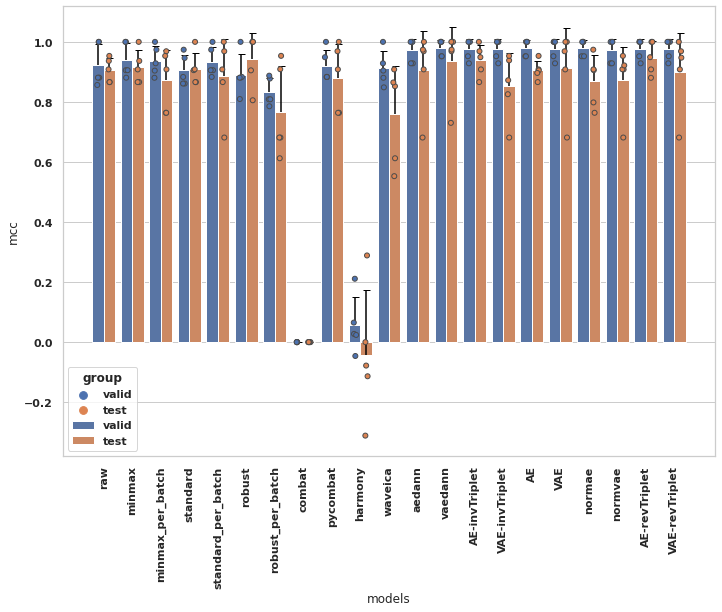

In [11]:
N = len(ae_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="mcc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=ae_classif['model'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()

In [12]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_885786/1549152850.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_885786/1549152850.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_885786/1549152850.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


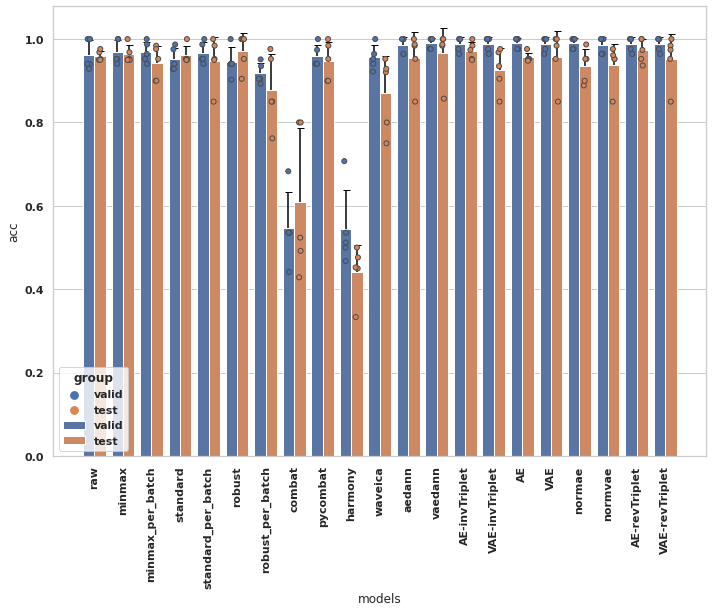

In [13]:
N = len(ae_classif['model'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group')
g = sns.stripplot(
    x="models", 
    y="acc", 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.set_xticklabels(rotation=90, labels=ae_classif['model'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims,
            yerr=df_valid.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims,
            yerr=df_test.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
plt.show()